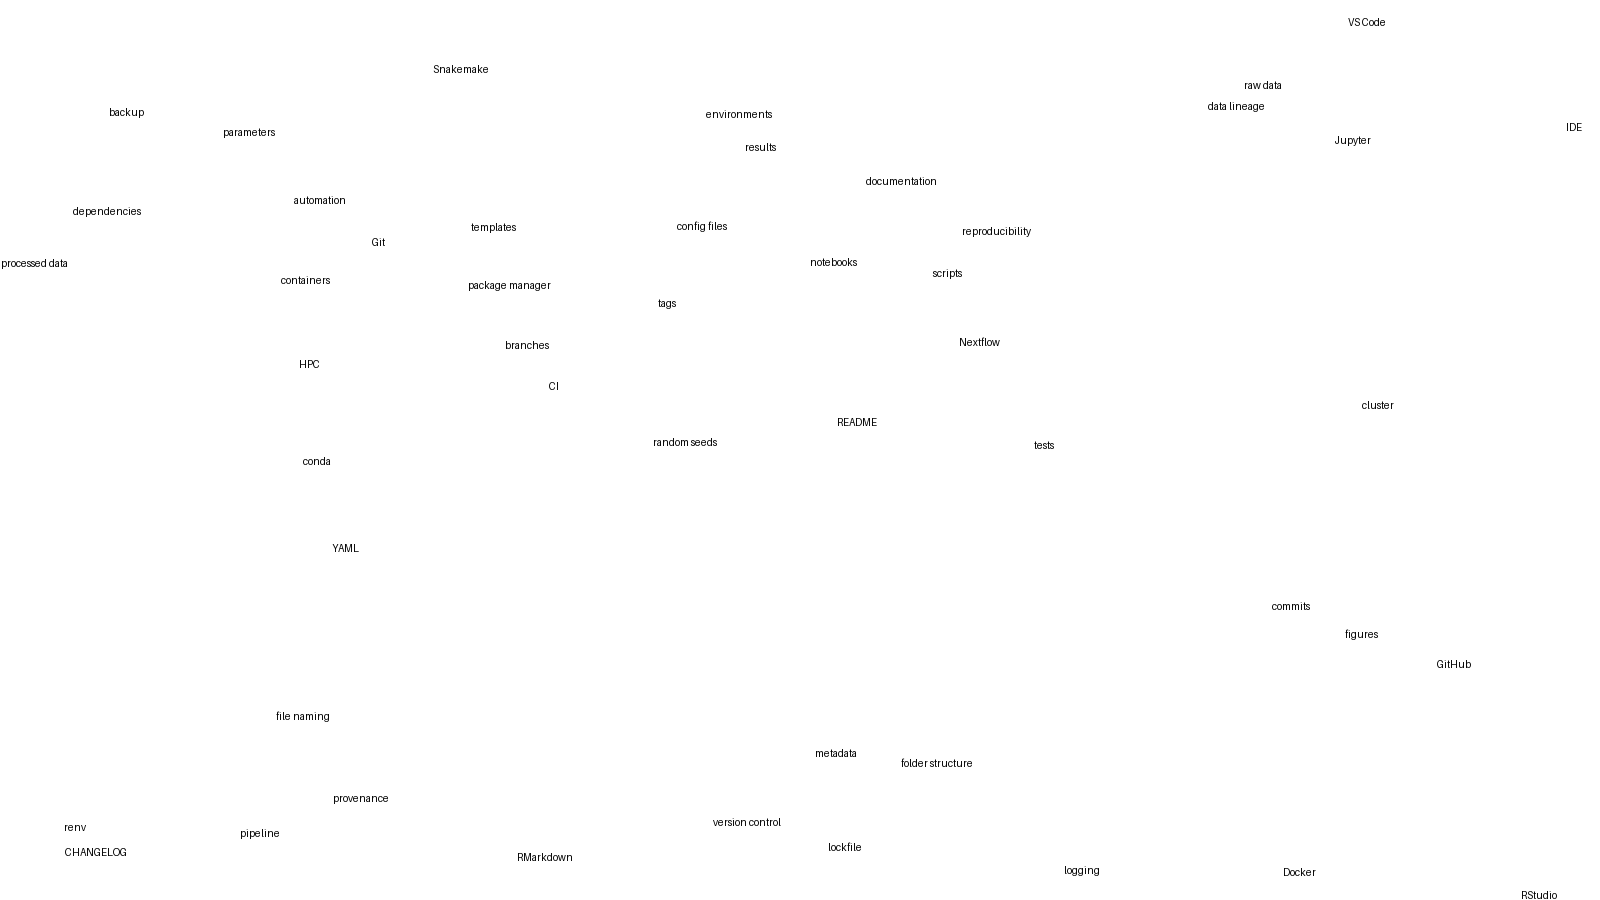

In [2]:
from PIL import Image, ImageDraw, ImageFont
import random
from IPython.display import display

# Keywords and weights
words = {
    "reproducibility": 8, "file naming": 6, "folder structure": 6, "metadata": 5,
    "documentation": 5, "README": 4, "CHANGELOG": 4, "version control": 8,
    "Git": 7, "GitHub": 7, "branches": 5, "tags": 5, "commits": 5,
    "environments": 7, "conda": 7, "renv": 6, "YAML": 5, "lockfile": 5,
    "dependencies": 6, "package manager": 6, "Docker": 6, "containers": 5,
    "Snakemake": 5, "Nextflow": 5, "pipeline": 7, "config files": 5,
    "parameters": 5, "random seeds": 4, "logging": 4, "notebooks": 5,
    "Jupyter": 5, "RMarkdown": 5, "VS Code": 6, "RStudio": 6, "IDE": 5,
    "tests": 5, "CI": 4, "data lineage": 4, "provenance": 4, "raw data": 5,
    "processed data": 5, "results": 5, "figures": 4, "scripts": 5,
    "templates": 4, "automation": 4, "HPC": 4, "cluster": 4, "backup": 3
}

# Create blank canvas
width, height = 1600, 900
img = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(img)

# Load font
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"
    base_font = ImageFont.truetype(font_path, 20)
except:
    base_font = ImageFont.load_default()
    font_path = None

placed = []

def overlaps(box, others, padding=10):
    x1, y1, x2, y2 = box
    for ox1, oy1, ox2, oy2 in others:
        if not (x2 + padding < ox1 or x1 - padding > ox2 or
                y2 + padding < oy1 or y1 - padding > oy2):
            return True
    return False

max_weight = max(words.values())
min_weight = min(words.values())

for word, w in sorted(words.items(), key=lambda x: -x[1]):
    size = int(20 + (w - min_weight) / (max_weight - min_weight + 1e-6) * 60)

    try:
        font = ImageFont.truetype(font_path, size) if font_path else base_font
    except:
        font = base_font

    for _ in range(200):
        bbox = draw.textbbox((0, 0), word, font=font)
        text_w = bbox[2] - bbox[0]
        text_h = bbox[3] - bbox[1]

        x = random.randint(0, width - text_w)
        y = random.randint(0, height - text_h)
        box = (x, y, x + text_w, y + text_h)

        if not overlaps(box, placed):
            draw.text((x, y), word, fill="black", font=font)
            placed.append(box)
            break

# Display directly in notebook
display(img)

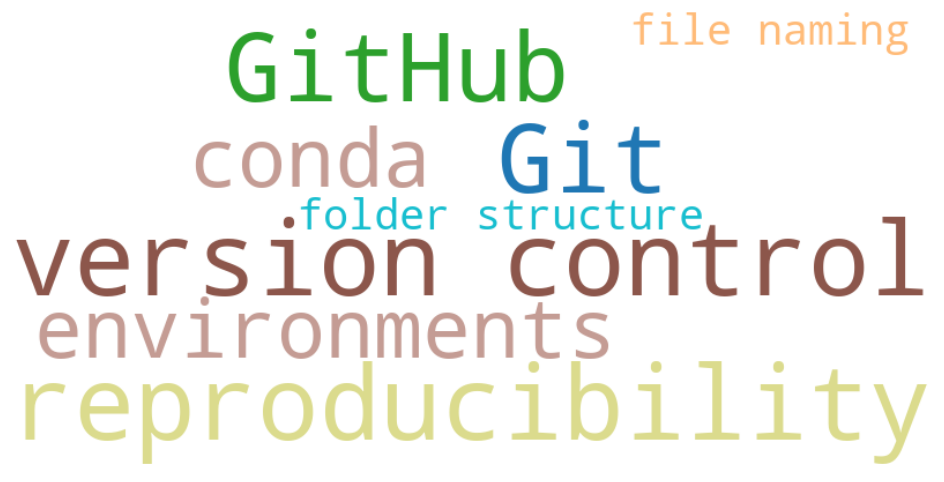

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# your words dict: (string → weight)
words = {
    "reproducibility": 8,
    "version control": 8,
    "Git": 7,
    "GitHub": 7,
    "environments": 7,
    "conda": 7,
    "folder structure": 6,
    "file naming": 6,
}

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="tab20"  # or other matplotlib colormap e.g. "viridis", "rainbow"
).generate_from_frequencies(words)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

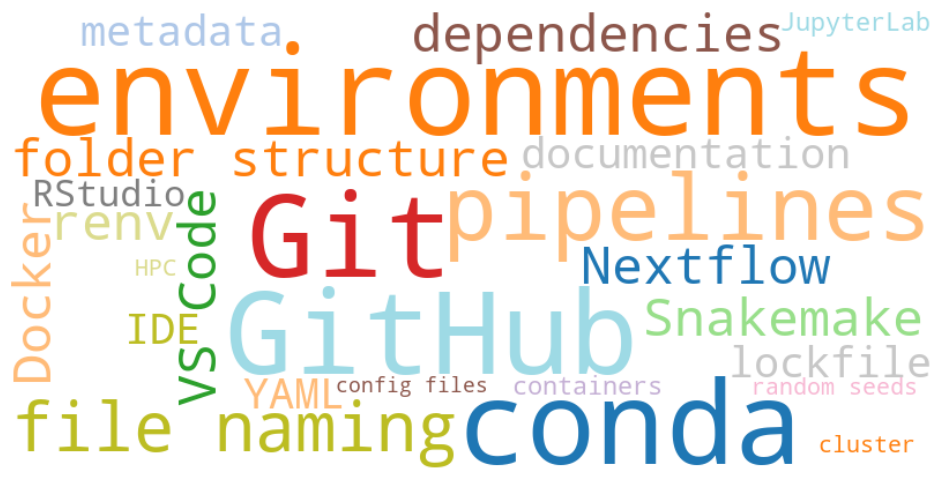

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# your words dict: (string → weight)
words = {
    "Git": 8,
    "GitHub": 8,
    "file naming": 7,
    "folder structure": 7,
    "documentation": 6,
    "metadata": 6,
    "environments": 9,
    "conda": 8,
    "renv": 7,
    "YAML": 6,
    "lockfile": 6,
    "dependencies": 7,
    "pipelines": 8,
    "Snakemake": 7,
    "Nextflow": 7,
    "IDE": 6,
    "VS Code": 7,
    "RStudio": 6,
    "JupyterLab": 6,
    "Docker": 7,
    "containers": 6,
    "HPC": 5,
    "cluster": 5,
    "random seeds": 5,
    "config files": 5,
}

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="tab20"  # or other matplotlib colormap e.g. "viridis", "rainbow"
).generate_from_frequencies(words)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()